### Vamos usar o imageset fashion mnist, para introduzir redeus neurais

In [1]:
import tensorflow as tf
from tensorflow import keras

### Importar imageset (nativo no keras.datasets)

In [3]:
fashion_imageset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_imageset.load_data()
#60k train, 10k test, 10 classes (multiclass) - 0..9

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Vamos agora criar a arquitetura de nossa rede neural, com uma sequência de camadas

0	Camisetas/Top (T-shirt/top)
1	Calça (Trouser)
2	Suéter (Pullover)
3	Vestidos (Dress)
4	Casaco (Coat)
5	Sandálias (Sandal)
6	Camisas (Shirt)
7	Tênis (Sneaker)
8	Bolsa (Bag)
9	Botas (Ankle boot)

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu), #128 neuronios na camada escondida (aprender o padrão dos pixels...)
    keras.layers.Dense(10, activation=tf.nn.softmax) #funções de ativação
])

### Configuramos aqui os hiperparâmetros otimizador e função de perda para o treinamento

In [23]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Treinamos então o modelo

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 9.0705
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.7272
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6291
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.5804
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.5549


### Avaliamos o modelo em dados de teste não vistos no treinamento

In [24]:
results = model.evaluate(test_images, test_labels,verbose=2)
#loss, acc

313/313 - 1s - 5ms/step - accuracy: 0.7993 - loss: 0.6149


In [22]:
#dict(zip(model.metrics_names, results))

In [25]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
predictions[0]

array([7.8680370e-25, 1.9879881e-30, 4.8640170e-29, 1.1314219e-22,
       6.8294576e-32, 3.4210578e-02, 5.0147613e-22, 4.2198438e-02,
       1.6669225e-12, 9.2359090e-01], dtype=float32)

In [28]:
import numpy as np
np.argmax(predictions[0])

np.int64(9)

In [30]:
import matplotlib.pyplot as plt
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

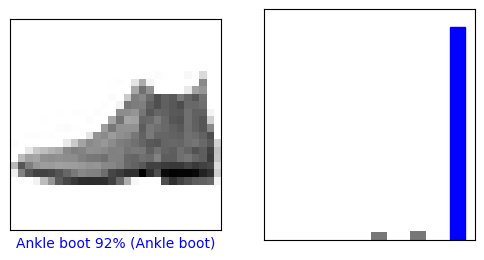

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

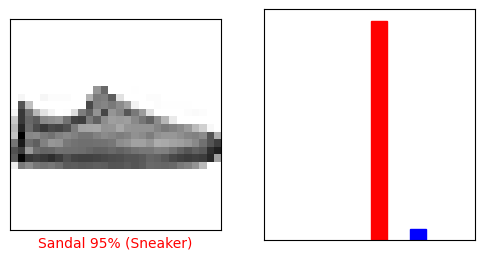

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

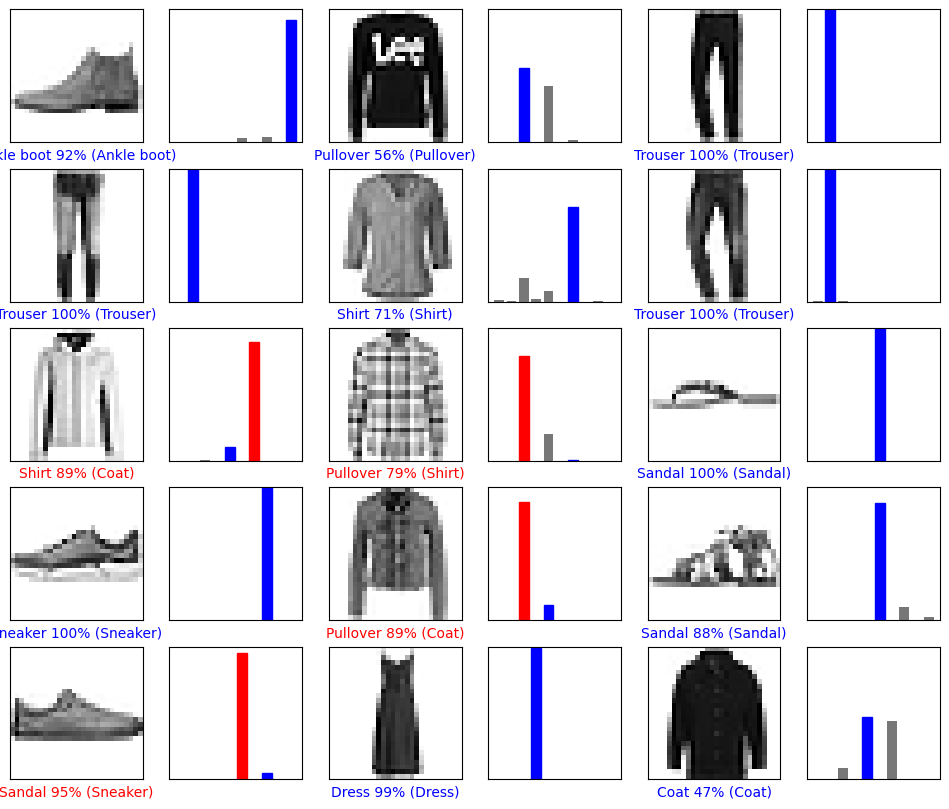

In [35]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [36]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [37]:
#Modelos tf.keras são otimizados para fazer predições em um batch, ou coleções, de exemplos de uma vez.
#De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:


# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[7.8680075e-25 1.9879881e-30 4.8639800e-29 1.1314178e-22 6.8294059e-32
  3.4210578e-02 5.0147426e-22 4.2198524e-02 1.6669194e-12 9.2359096e-01]]


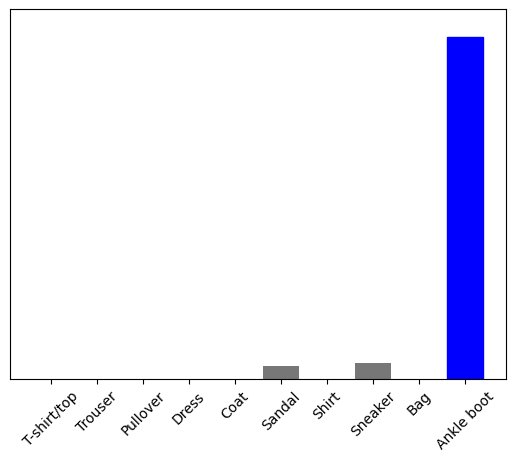

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
#model.predict retorna a lista de listas — uma lista para cada imagem em um batch de dados. Pegue a predição de nossa (única) imagem no batch:


np.argmax(predictions_single[0])

np.int64(9)

In [41]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.